# Framework

In [1]:
%run Library.ipynb                         # import library
%run Class_Definition.ipynb                # initialize class
%run Folder_Creation.ipynb                 # create local folder

%run Get_Info.ipynb                        # get building info 
%run Create_Sat_User_Geodataframe.ipynb    # create GeoDataframe for link info 

%run Calculate_State.ipynb                 # calculate LOS/NLOS state                
%run Calculate_Pathloss.ipynb              # calculate path loss

In [261]:
if __name__ == '__main__':
    
    
    # preset
    # =================================================
    shp_buildings  = 'Final_Building_polygon.shp'   # building 
    time_s = str('20230327000000')                  # time list start 
    time_e = str('20230328000000')                  # time list end 
    time_step = 30                                  # frequency of SAT location sampling (sec/time)
    ue_number = 2
    ue_list = [
                ['ED',24.787006,120.997063,0],
                ['EE',24.785963,120.996767,0]]      # NYCU ED,EE
                                                    # format (name,lat,lon,height)
    
    para = Simulation_Parameter()                   
    para.Sat_num = 5                                # The number of adopted satellite orbits.
    para.Txt_sat_list = 'sat_id_list.txt'           # The txt stores NORAD ID of used orbit.
    para.Level_avg_height = 3.5                     # The average height per floor. (metre)
    para.Effective_range = 1000                     # The maximum distance at which building equipment can affect users. (metre)
    
    para.Fc = 2204.400 * 10e6                       # (Hz)
    
    # create building
    # =================================================
    buildingsData  = getInfo_Buildings(shp_buildings)
    
    # create time list 
    # =================================================
    time_list = Time_List()
    
    time_start = datetime.datetime.strptime(time_s,"%Y%m%d%H%M%S")
    time_end   = datetime.datetime.strptime(time_e,"%Y%m%d%H%M%S")
    
    time_list.Start = time_start
    time_list.End   = time_end
    time_list.Step  = time_step
    
    # UE location
    # =================================================
    ue_location_list = []
    for user in range(ue_number) :

        new_User_Location = User_Location()
        new_User_Location.Name      = ue_list[user][0]
        new_User_Location.Latitude  = ue_list[user][1]
        new_User_Location.Longitude = ue_list[user][2]
        new_User_Location.Height    = ue_list[user][3]

        ue_location_list.append(new_User_Location)
    

    # create geo dataframe
    # =================================================
    
    for ue_location in ue_location_list :
        
        var_name_4326 = 'gdf_4326_' + ue_location.Name
        globals()[var_name_4326] = create_Geodataframe(para.Txt_sat_list,para.Sat_num,time_list,ue_location)
    
        var_name_3857='gdf_3857_' + ue_location.Name
        globals()[var_name_3857] = globals()[var_name_4326].to_crs(3857) # coordinate from 4326 to 3857

    
    # calculate LOS/NLOS state
    # =================================================
    for ue_location in ue_location_list :
        
        var_name_3857='gdf_3857_' + ue_location.Name
        globals()[var_name_3857] =  calculate_State(globals()[var_name_3857],buildingsData,para)
        
        
    # calculate path loss
    # =================================================
    for ue_location in ue_location_list :
        var_name_3857='gdf_3857_' + ue_location.Name
        globals()[var_name_3857] =  calculate_Pathloss(globals()[var_name_3857],para)
    
    
    # write gdf (geo-dataframe) to geojson
    # =================================================
    for ue_location in ue_location_list :
        
        var_name_3857='gdf_3857_' + ue_location.Name
        
        filename = 'gdf_3857_'+ str(ue_location.Name) + '_' + time_s + '_' + time_e + '_' + str(para.Sat_num) + '.geojson'      
        folder_path = 'data/Geojson/'
        globals()[var_name_3857].to_file(folder_path + filename, driver='GeoJSON')  

    print('done')
    

caluculate state
running :  555 / 576
556 out_of_range
557 out_of_range
558 out_of_range
559 out_of_range
560 out_of_range
561 out_of_range
562 out_of_range
563 out_of_range
564 out_of_range
565 out_of_range
566 out_of_range
567 out_of_range
568 out_of_range
569 out_of_range
570 out_of_range
571 out_of_range
572 out_of_range
573 out_of_range
574 out_of_range
575 out_of_range
done


# Figure Plot

In [9]:
%run Library.ipynb                           # import library

# map

%run plot_Intersection_and_Sectionview.ipynb
%run plot_Basemap.ipynb
%run plot_Basemap_Rain.ipynb

# bar

%run plot_Bar_Satellite_Location_Percentage.ipynb
%run plot_Bar_Satellite_Location_Samples.ipynb
%run plot_Bar_Angle_Samples.ipynb
%run plot_Bar_Angle_Percentage.ipynb

# time-dependent sequence

%run plot_Time_Dependent_State.ipynb
%run plot_Time_Dependent_Basic_Path_Loss.ipynb

# skyplot

%run plot_Skyplot_Date.ipynb
%run plot_Skyplot_Allsatellite.ipynb
%run plot_Skyplot_Contour.ipynb

In [3]:
file_list = glob.glob(r'./data/Geojson/*_5.geojson')
df_all = pd.DataFrame()

# df concat
# ======================================
for file in file_list :    
    
    df = gpd.read_file(open(file))
    filename = file.replace('.\\',"").replace('.geojson',"")
    print(filename)
    
    name_split = filename.split('_')
    df['location'] = name_split[2]
    df['day'] = df['TIME'].dt.day
    
    df_all = pd.concat([df_all,df],axis=0,ignore_index=True)

./data/Geojson\gdf_3857_ED_20230327000000_20230328000000_5
./data/Geojson\gdf_3857_EE_20230327000000_20230328000000_5


In [10]:
# map
# ======================================

# plot_intersection_and_sectionview(df_all,buildingsData,para)
shp_buildings  = 'Final_Building_polygon.shp'
buildingsData  = getInfo_Buildings(shp_buildings)

#plot_basemap(buildingsData)
plot_basemap_rain(buildingsData)
# bar
# ======================================

# plot_bar_satellite_location_percentage(df_all,50,70) # 50~70
# plot_bar_satellite_location_samples(df_all,0,90)
# plot_bar_angle_samples(df_all)
# plot_bar_angle_percentage(df_all)

# Time-dependent sequence
# ======================================

# df_all =  calculate_Pathloss(df_all,para)

# plot_time_dependent_state(df_all)
# plot_time_dependent_basic_path_loss(df_all,para)

# skyplot
# ======================================

# plot_skyplot_date(df_all)
# plot_skyplot_allsatellite(df_all)

create directory : basemap_rain


In [ ]:
# code 參考 :
# https://watch.ncdr.nat.gov.tw/watch_api_open

# basemap 安裝失敗
# 參考這篇 : https://stackoverflow.com/questions/36919748/matplotlib-mpl-toolkits-axesgrid-imagegrid-and-anaconda-how-do-i-get-these-f
# conda install -c conda-forge basemap 

In [15]:
from mpl_toolkits.basemap import Basemap

In [25]:
# matplotlib._contour 在3.6後開始不支援 所以需要降級3.5 參考下文
# https://stackoverflow.com/questions/73792756/plotnine-is-broken-with-matplotlib-3-6
# 使用 pip install matplotlib==3.5 

# 要串接政府API需要token
# NCDR API :https://datahub.ncdr.nat.gov.tw/paradigm
# 要申請token 請申辦E政府帳號 ==
# https://www.cp.gov.tw/portal/cpinit/Register.aspx
# 限定系統還要綁IP有夠麻煩
# python 的 shapefile 資料扁平化 3D to 2D
# https://gist.github.com/rmania/8c88377a5c902dfbc134795a7af538d8



In [57]:
from shapely.geometry import Polygon, MultiPolygon, shape, Point
import geopandas as gp

def convert_3D_2D(geometry):
    '''
    Takes a GeoSeries of 3D Multi/Polygons (has_z) and returns a list of 2D Multi/Polygons
    '''
    new_geo = []
    for p in geometry:
        if p.has_z:
            if p.geom_type == 'Polygon':
                lines = [xy[:2] for xy in list(p.exterior.coords)]
                new_p = Polygon(lines)
                new_geo.append(new_p)
            elif p.geom_type == 'MultiPolygon':
                new_multi_p = []
                for ap in p:
                    lines = [xy[:2] for xy in list(ap.exterior.coords)]
                    new_p = Polygon(lines)
                    new_multi_p.append(new_p)
                new_geo.append(MultiPolygon(new_multi_p))
    return new_geo

fp = "data/Buildings/Final_Building_polygon.shp"
geodf_2d_3857 = gp.GeoDataFrame.from_file(fp) # plug_in your shapefile
geodf_2d_3857.geometry = convert_3D_2D(geodf_2d_3857.geometry) # new geodf with 2D geometry series

geodf_2d_4326 = geodf_2d_3857.to_crs(epsg=4326)
geodf_2d_4326.to_file('data/Buildings/Final_Building_polygon_2D.shp')  

# 下面這格式只吃lat lon 
# 所以我要把 3857再轉回4326

print('done')

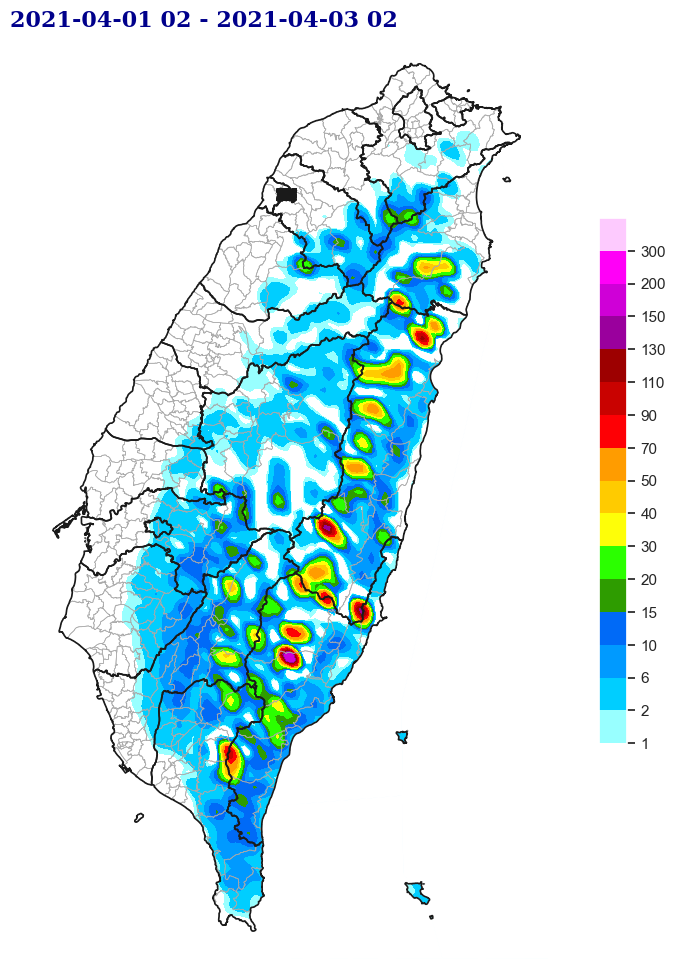

In [58]:
import csv
import numpy as np
from datetime import datetime, timedelta
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.font_manager import *
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
%matplotlib inline

starthrs=24
endhrs=72

# domain 180x150
filename='data/rain data/ensemble05km_2021033018_N00_0000_raintot.csv'

# 計算起始與結束時間
initseq=filename.split('_')[1]
stime_utc=datetime.strptime(str(initseq),"%Y%m%d%H")
stime=stime_utc+timedelta(hours=starthrs+8)
etime=stime_utc+timedelta(hours=endhrs+8)

# 圖檔檔名
t1=stime.strftime("%Y%m%d%H")
t2=etime.strftime("%Y%m%d%H")
figname=t1+'-'+t2+'_rainmap.png'


# 讀取csv檔，轉換成dictionary
data=[]
with open(filename, newline='') as csvfile:
    for line in csv.DictReader(csvfile):
        data.append(dict(line))

# 列出資料數
rows=len(data)

# 讀區間雨量
lons=[]
lats=[]
values=[]

i=0
while i<len(data):
   lons.append(data[i]['Lon'])
   lats.append(data[i]['Lat'])

   sumrn=0
   if starthrs==0:
      sumrn=data[i]['H'+str(endhrs).zfill(2)]
   else:
      sumrn=float(data[i]['H'+str(endhrs).zfill(2)])-float(data[i]['H'+str(starthrs).zfill(2)])

   values.append(sumrn)

   i+=1

# 內插至等經緯度網格
lat1=21.5
lon1=119.5
nlons=131
nlats=195
dx=0.02
lat2=lat1+dx*(nlats-1)
lon2=lon1+dx*(nlons-1)
xi = np.linspace(lon1,lon2,nlons)
yi = np.linspace(lat1,lat2,nlats)
zi = griddata((lons, lats), values, (xi[None,:], yi[:,None]), method='cubic')

x2 = (lon1+dx*np.indices((nlats,nlons))[1,:,:])
y2 = (lat1+dx*np.indices((nlats,nlons))[0,:,:])

# 畫網格資料至地圖上

plt.figure(figsize=(9, 12))
plt.axis('off')
m = Basemap(width=240000,height=400000,projection='lcc', resolution=None,lat_1=15,lat_2=30,lat_0=23.6,lon_0=121.00)
clevs = [0,1,2,6,10,15,20,30,40,50,70,90,110,130,150,200,300,600]
ccols = ['#ffffff','#98ffff','#00ceff','#009aff','#006af7','#2e9c00','#2bff00','#fefe08','#ffcb00','#ff9c00','#fe0005','#c90200','#9d0000','#9a009d','#cf00d7','#ff00f7','#fdcafe']
cs = m.contourf(x2,y2,zi,levels=clevs,colors=ccols,latlon=True)

plt.colorbar(ticks=clevs[1:17],fraction=0.04)

lefttitle=str(stime)[0:13]+' - '+str(etime)[0:13]

# 將陸地以外的資料蓋掉
ax1 = plt.gca()
m.readshapefile('data/rain data/shp/TAIWAN_MASK','TAIWAN_MASK',drawbounds=False)
for nshape, seg in enumerate(m.TAIWAN_MASK):
    poly = Polygon(seg, facecolor='white',edgecolor='white',linewidth=0.8)
    ax1.add_patch(poly)

# 疊加鄉鎮shpefile
m.readshapefile('data/rain data/shp/TWN_TOWN','TWN_TOWN',linewidth=0.5,color='#aaaaaa')

# 疊加縣市shpefile
m.readshapefile('data/rain data/shp/TWN_CITY','TWN_CITY',linewidth=1.2)

# 疊加建築物
m.readshapefile('data/Buildings/Final_Building_polygon_2D','Buildings',linewidth=2)


# 圖片標題
plt.title(lefttitle, fontdict={'family': 'serif', 'color' : 'darkblue', 'weight': 'bold', 'size': 16}, loc='left')

# 由螢幕顯示圖片
plt.show()

# 儲存圖片
#plt.savefig('rainmap.png', transparent=False, edgecolor='white', bbox_inches="tight")



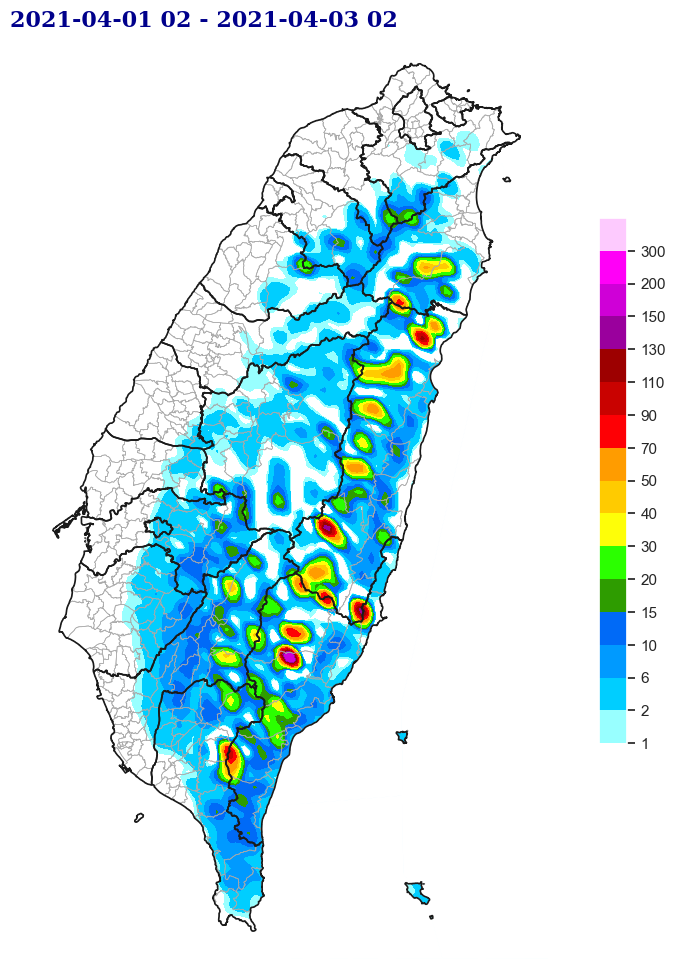

In [38]:
import csv
import numpy as np
from datetime import datetime, timedelta
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.font_manager import *
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
%matplotlib inline

starthrs=24
endhrs=72

# domain 180x150
filename='data/rain data/ensemble05km_2021033018_N00_0000_raintot.csv'

# 計算起始與結束時間
initseq=filename.split('_')[1]
stime_utc=datetime.strptime(str(initseq),"%Y%m%d%H")
stime=stime_utc+timedelta(hours=starthrs+8)
etime=stime_utc+timedelta(hours=endhrs+8)

# 圖檔檔名
t1=stime.strftime("%Y%m%d%H")
t2=etime.strftime("%Y%m%d%H")
figname=t1+'-'+t2+'_rainmap.png'


# 讀取csv檔，轉換成dictionary
data=[]
with open(filename, newline='') as csvfile:
    for line in csv.DictReader(csvfile):
        data.append(dict(line))

# 列出資料數
rows=len(data)

# 讀區間雨量
lons=[]
lats=[]
values=[]

i=0
while i<len(data):
   lons.append(data[i]['Lon'])
   lats.append(data[i]['Lat'])

   sumrn=0
   if starthrs==0:
      sumrn=data[i]['H'+str(endhrs).zfill(2)]
   else:
      sumrn=float(data[i]['H'+str(endhrs).zfill(2)])-float(data[i]['H'+str(starthrs).zfill(2)])

   values.append(sumrn)

   i+=1

# 內插至等經緯度網格
lat1=21.5
lon1=119.5
nlons=131
nlats=195
dx=0.02
lat2=lat1+dx*(nlats-1)
lon2=lon1+dx*(nlons-1)
xi = np.linspace(lon1,lon2,nlons)
yi = np.linspace(lat1,lat2,nlats)
zi = griddata((lons, lats), values, (xi[None,:], yi[:,None]), method='cubic')

x2 = (lon1+dx*np.indices((nlats,nlons))[1,:,:])
y2 = (lat1+dx*np.indices((nlats,nlons))[0,:,:])

# 畫網格資料至地圖上

plt.figure(figsize=(9, 12))
plt.axis('off')
m = Basemap(width=240000,height=400000,projection='lcc', resolution=None,lat_1=15,lat_2=30,lat_0=23.6,lon_0=121.00)
clevs = [0,1,2,6,10,15,20,30,40,50,70,90,110,130,150,200,300,600]
ccols = ['#ffffff','#98ffff','#00ceff','#009aff','#006af7','#2e9c00','#2bff00','#fefe08','#ffcb00','#ff9c00','#fe0005','#c90200','#9d0000','#9a009d','#cf00d7','#ff00f7','#fdcafe']
cs = m.contourf(x2,y2,zi,levels=clevs,colors=ccols,latlon=True)

plt.colorbar(ticks=clevs[1:17],fraction=0.04)

lefttitle=str(stime)[0:13]+' - '+str(etime)[0:13]

# 將陸地以外的資料蓋掉
ax1 = plt.gca()
m.readshapefile('data/rain data/shp/TAIWAN_MASK','TAIWAN_MASK',drawbounds=False)
for nshape, seg in enumerate(m.TAIWAN_MASK):
    poly = Polygon(seg, facecolor='white',edgecolor='white',linewidth=0.8)
    ax1.add_patch(poly)

# 疊加鄉鎮shpefile 輪廓線
m.readshapefile('data/rain data/shp/TWN_TOWN','TWN_TOWN',linewidth=0.5,color='#aaaaaa')

# 疊加縣市shpefile 輪廓線
m.readshapefile('data/rain data/shp/TWN_CITY','TWN_CITY',linewidth=1.2)

# 圖片標題
plt.title(lefttitle, fontdict={'family': 'serif', 'color' : 'darkblue', 'weight': 'bold', 'size': 16}, loc='left')

# 由螢幕顯示圖片
plt.show()

# 儲存圖片
#plt.savefig('rainmap.png', transparent=False, edgecolor='white', bbox_inches="tight")

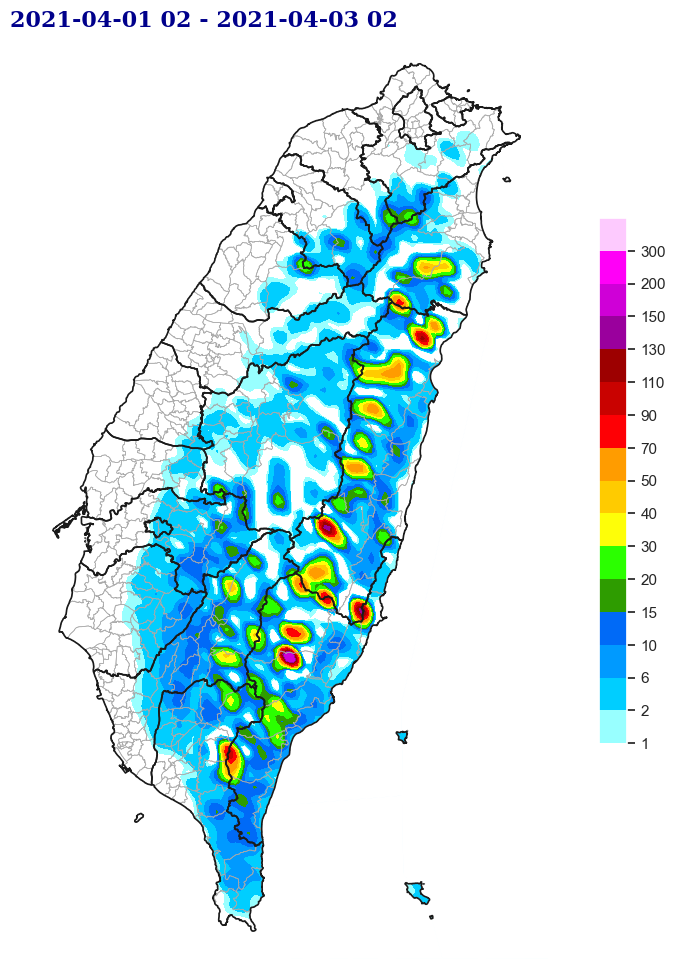

In [43]:
import csv
import numpy as np
from datetime import datetime, timedelta
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.font_manager import *
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
%matplotlib inline

starthrs=24
endhrs=72

# domain 180x150
filename='data/rain data/ensemble05km_2021033018_N00_0000_raintot.csv'

# 計算起始與結束時間
initseq=filename.split('_')[1]
stime_utc=datetime.strptime(str(initseq),"%Y%m%d%H")
stime=stime_utc+timedelta(hours=starthrs+8)
etime=stime_utc+timedelta(hours=endhrs+8)

# 圖檔檔名
t1=stime.strftime("%Y%m%d%H")
t2=etime.strftime("%Y%m%d%H")
figname=t1+'-'+t2+'_rainmap.png'


# 讀取csv檔，轉換成dictionary
data=[]
with open(filename, newline='') as csvfile:
    for line in csv.DictReader(csvfile):
        data.append(dict(line))

# 列出資料數
rows=len(data)

# 讀區間雨量
lons=[]
lats=[]
values=[]

i=0
while i<len(data):
   lons.append(data[i]['Lon'])
   lats.append(data[i]['Lat'])

   sumrn=0
   if starthrs==0:
      sumrn=data[i]['H'+str(endhrs).zfill(2)]
   else:
      sumrn=float(data[i]['H'+str(endhrs).zfill(2)])-float(data[i]['H'+str(starthrs).zfill(2)])

   values.append(sumrn)

   i+=1

# 內插至等經緯度網格
lat1=21.5
lon1=119.5
nlons=131
nlats=195
dx=0.02
lat2=lat1+dx*(nlats-1)
lon2=lon1+dx*(nlons-1)
xi = np.linspace(lon1,lon2,nlons)
yi = np.linspace(lat1,lat2,nlats)
zi = griddata((lons, lats), values, (xi[None,:], yi[:,None]), method='cubic')

x2 = (lon1+dx*np.indices((nlats,nlons))[1,:,:])
y2 = (lat1+dx*np.indices((nlats,nlons))[0,:,:])

# 畫網格資料至地圖上

plt.figure(figsize=(9, 12))
plt.axis('off')
m = Basemap(width=240000,height=400000,projection='lcc', resolution=None,lat_1=15,lat_2=30,lat_0=23.6,lon_0=121.00)
clevs = [0,1,2,6,10,15,20,30,40,50,70,90,110,130,150,200,300,600]
ccols = ['#ffffff','#98ffff','#00ceff','#009aff','#006af7','#2e9c00','#2bff00','#fefe08','#ffcb00','#ff9c00','#fe0005','#c90200','#9d0000','#9a009d','#cf00d7','#ff00f7','#fdcafe']
cs = m.contourf(x2,y2,zi,levels=clevs,colors=ccols,latlon=True)

plt.colorbar(ticks=clevs[1:17],fraction=0.04)

lefttitle=str(stime)[0:13]+' - '+str(etime)[0:13]

# 將陸地以外的資料蓋掉
ax1 = plt.gca()
m.readshapefile('data/rain data/shp/TAIWAN_MASK','TAIWAN_MASK',drawbounds=False)
for nshape, seg in enumerate(m.TAIWAN_MASK):
    poly = Polygon(seg, facecolor='white',edgecolor='white',linewidth=0.8)
    ax1.add_patch(poly)

# 疊加鄉鎮shpefile
m.readshapefile('data/rain data/shp/TWN_TOWN','TWN_TOWN',linewidth=0.5,color='#aaaaaa')

# 疊加縣市shpefile
m.readshapefile('data/rain data/shp/TWN_CITY','TWN_CITY',linewidth=1.2)

# 圖片標題
plt.title(lefttitle, fontdict={'family': 'serif', 'color' : 'darkblue', 'weight': 'bold', 'size': 16}, loc='left')

# 儲存圖片
plt.savefig('rainmap.png', transparent=False, edgecolor='white', bbox_inches="tight")

# 由螢幕顯示圖片
plt.show()

In [45]:
import requests
from datetime import datetime, timedelta

#----------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------

# 設定成員
member='N00'

# 設定Token
myToken = '請填入Token'

# API URL
myUrl = 'https://dataapi2.ncdr.nat.gov.tw/NCDR/Ensemble05km?Layer=0000&Variable=raintot&Number='+member+'&DataFormat=csv'

#----------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------
# token 參數
head = {'Token': myToken}

# 下載API資料
r = requests.get(myUrl, headers=head)

print(r.headers)

filename= r.headers['Content-Disposition'].split("=")[1]
initseq = filename.split("_")[1]

print(filename)

# 預報時間計算
initial=datetime.strptime(str(initseq),"%Y%m%d%H")
initial_LST=initial+timedelta(hours=8)

#member=fileinfo[2]

# 預報時間計算
initial=datetime.strptime(str(initseq),"%Y%m%d%H")
initial_LST=initial+timedelta(hours=8)
forecast_LST=initial_LST+timedelta(hours=84)

print('\n --- >>> save file: '+filename)
print(' --- >>> Member: ',member,', Initial: ',initial,' UTC ')
print(' --- >>> Forecast from ',initial_LST,' to ',forecast_LST,' LST (84 hours)\n')

# 將資料存成檔案
f=open(filename,"w")
f.write(r.text)
f.close()


UnicodeEncodeError: 'latin-1' codec can't encode characters in position 0-2: ordinal not in range(256)